# Base Pair Probability Analysis

This notebook demonstrates how to analyze base pair probabilities, which provide insights into the structural ensemble of RNA molecules.


In [1]:
import vienna
import matplotlib.pyplot as plt
import numpy as np

## Folding with Base Pair Probabilities

Enable base pair probability calculation by setting `bp_probs=True`:


In [2]:
sequence = "GGGGAAAACCCC"
result = vienna.fold(sequence, bp_probs=True)

print(f"Sequence: {sequence}")
print(f"Structure: {result.dot_bracket}")
print(f"\nNumber of base pairs with probability > 0: {len(result.bp_probs)}")
print("\nBase pair probabilities:")

for bp in sorted(result.bp_probs, key=lambda x: x[2], reverse=True):
    i, j, prob = bp
    print(f"  Position {i:2d} - {j:2d}: {prob:.4f}")

Sequence: GGGGAAAACCCC
Structure: ((((....))))

Number of base pairs with probability > 0: 11

Base pair probabilities:
  Position  4 - 11: 0.8711
  Position  3 - 12: 0.8711
  Position  5 - 10: 0.8604
  Position  3 - 11: 0.1208
  Position  4 - 10: 0.1208
  Position  2 - 12: 0.1200
  Position  4 - 12: 0.0068
  Position  5 - 11: 0.0068
  Position  3 - 10: 0.0009
  Position  2 - 11: 0.0009
  Position  5 - 12: 0.0001


## Visualizing Base Pair Probability Matrix

Create a heatmap of base pair probabilities:


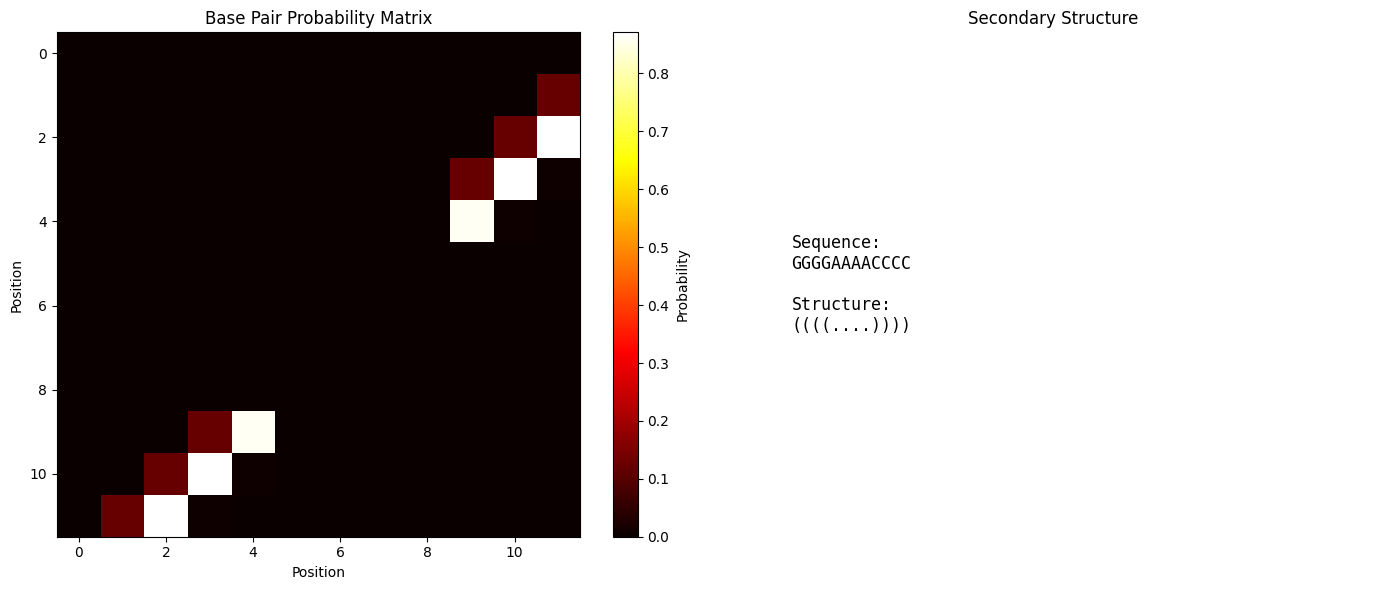

In [3]:
def plot_bp_prob_matrix(sequence, result):
    """Plot base pair probability matrix"""
    n = len(sequence)
    matrix = np.zeros((n, n))

    # Fill matrix with probabilities
    for bp in result.bp_probs:
        i, j, prob = bp
        matrix[i - 1][j - 1] = prob  # Convert to 0-indexed
        matrix[j - 1][i - 1] = prob  # Symmetric

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Heatmap
    im = ax1.imshow(matrix, cmap="hot", interpolation="nearest", aspect="auto")
    ax1.set_xlabel("Position")
    ax1.set_ylabel("Position")
    ax1.set_title("Base Pair Probability Matrix")
    plt.colorbar(im, ax=ax1, label="Probability")

    # Structure representation
    ax2.text(
        0.1,
        0.5,
        f"Sequence:\n{sequence}\n\nStructure:\n{result.dot_bracket}",
        fontsize=12,
        family="monospace",
        verticalalignment="center",
    )
    ax2.axis("off")
    ax2.set_title("Secondary Structure")

    plt.tight_layout()
    plt.show()


plot_bp_prob_matrix(sequence, result)

In [4]:
# Filter by probability threshold
thresholds = [0.5, 0.7, 0.9]

for threshold in thresholds:
    high_prob = [bp for bp in result.bp_probs if bp[2] >= threshold]
    print(f"\nBase pairs with probability >= {threshold}:")
    for bp in sorted(high_prob, key=lambda x: x[2], reverse=True):
        i, j, prob = bp
        print(f"  {sequence[i-1]}{i}-{sequence[j-1]}{j}: {prob:.4f}")


Base pairs with probability >= 0.5:
  G4-C11: 0.8711
  G3-C12: 0.8711
  A5-C10: 0.8604

Base pairs with probability >= 0.7:
  G4-C11: 0.8711
  G3-C12: 0.8711
  A5-C10: 0.8604

Base pairs with probability >= 0.9:


## Probability Distribution

Analyze the distribution of base pair probabilities:


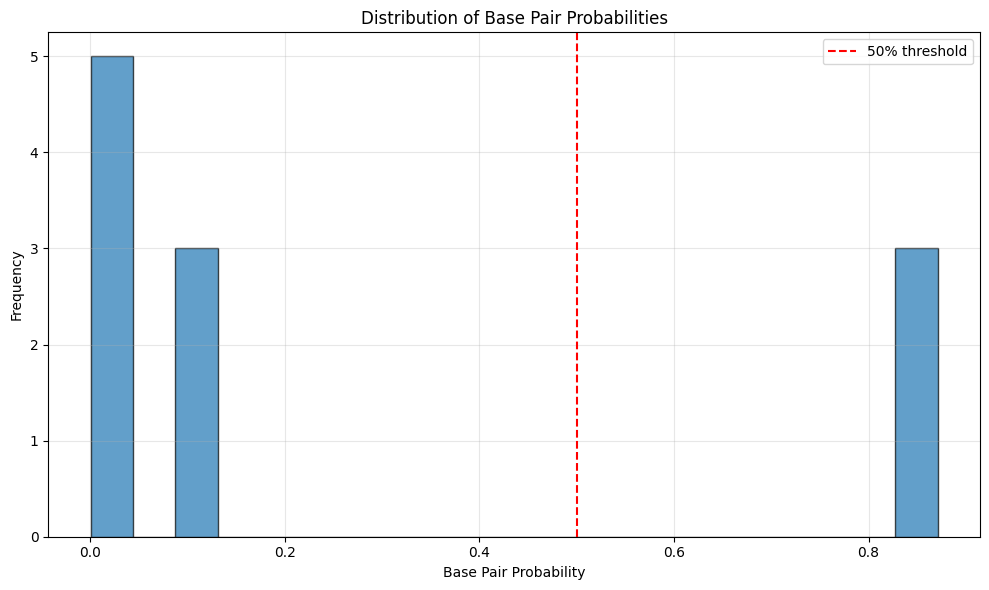

In [5]:
# Get probabilities
probs = [bp[2] for bp in result.bp_probs]

plt.figure(figsize=(10, 6))
plt.hist(probs, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Base Pair Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Base Pair Probabilities")
plt.axvline(x=0.5, color="r", linestyle="--", label="50% threshold")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()